# 4. Поиск приближённых значений корней нелинейных уравнений

Варианты заданий

С точностью $ \varepsilon = 10^{-3}, 10^{-6}, 10^{-9} $ найти приближённое значение корня уравнения, лежащее на интервале (0,10). Для поиска корня использовать метод дихотомии и метод Ньютона.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
a, b = 0, 10

def is_root_exists(f, a, b):
    return True if f(a) * f(b) < 0 else False

def f(x):
    return np.exp(np.sin(x / 2)) - np.atan(x) + 1

is_root_exists(f, a, b)

True

In [99]:
def dichotomies(f, a, b, eps=1e-9, history=False):
    x = []

    while abs(f((a + b) / 2)) >= eps:
        c = (a + b) / 2
        x.append(c)
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    x.append((a + b) / 2)

    x = np.array(x)
    if history:
        return x
    else:
        return x[-1]

def newton(f, a, b, eps=1e-9, history=False):
    df = lambda x: (f(x + eps) - f(x)) / eps

    x = [a if f(a) * df(df(a)) > 0 else b]

    while abs(f(x[-1])) >= eps:
        x.append(x[-1] - f(x[-1]) / df(x[-1]))
    
    x = np.array(x)
    if history:
        return x
    else:
        return x[-1]

In [102]:

df = pd.DataFrame({"eps": [1e-3, 1e-6, 1e-9]})
df["dichotomies_iterations"] = df["eps"].apply(lambda eps: len(dichotomies(f, a, b, eps, history=True)))
df["dichotomies_answer"] = df["eps"].apply(lambda eps: dichotomies(f, a, b, eps))
df["newton_iterations"] = df["eps"].apply(lambda eps: len(newton(f, a, b, eps, history=True)))
df["newton_answer"] = df["eps"].apply(lambda eps: newton(f, a, b, eps))
df

,eps,dichotomies_iterations,dichotomies_answer,newton_iterations,newton_answer
0,1.000000e-03,9,8.144531,5,10.915325
1,1.000000e-06,16,8.143158,6,10.914578
2,1.000000e-09,29,8.143156,7,10.914578


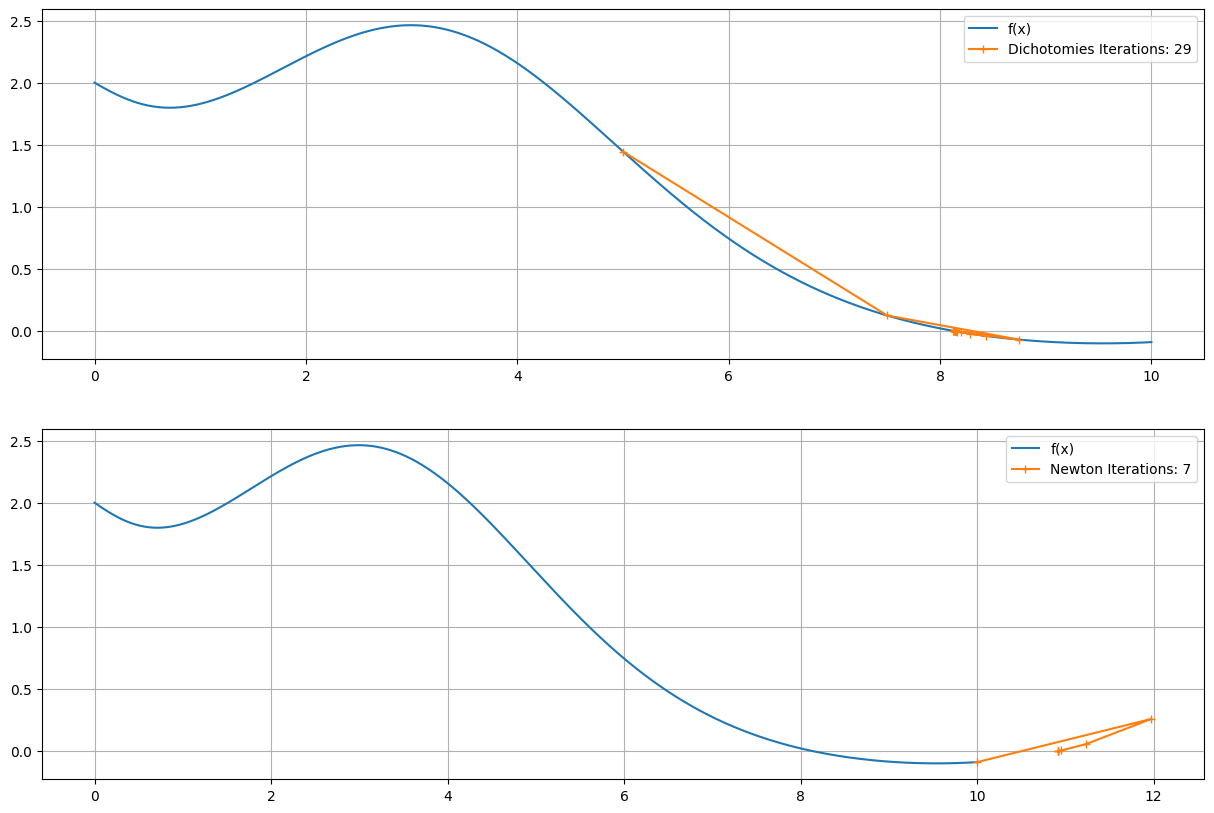

In [101]:
x = np.linspace(a, b, 1000)
x1 = dichotomies(f, a, b, history=True)
x2 = newton(f, a, b, history=True)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(x, f(x), label="f(x)")
plt.plot(x1, f(x1), '-+', label=f"Dichotomies Iterations: {len(x1)}")
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, f(x), label="f(x)")
plt.plot(x2, f(x2), '-+', label=f"Newton Iterations: {len(x2)}")
plt.grid()
plt.legend()

plt.show()